In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/salary-data/Salary_Data.csv


## Loading the dataset

In [2]:
data = pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


## EDA of dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


### Task: Check null values

In [4]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [5]:
## now, drop all null values
data.dropna(inplace=True)
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


### Task: Drop duplicate rows

In [6]:
len(data[data.duplicated() == False])

1787

In [7]:
data.drop_duplicates(inplace=True)
data,len(data)

(       Age  Gender    Education Level                  Job Title  \
 0     32.0    Male         Bachelor's          Software Engineer   
 1     28.0  Female           Master's               Data Analyst   
 2     45.0    Male                PhD             Senior Manager   
 3     36.0  Female         Bachelor's            Sales Associate   
 4     52.0    Male           Master's                   Director   
 ...    ...     ...                ...                        ...   
 6623  43.0  Female    Master's Degree  Digital Marketing Manager   
 6624  27.0    Male        High School              Sales Manager   
 6625  33.0  Female  Bachelor's Degree      Director of Marketing   
 6628  37.0    Male  Bachelor's Degree             Sales Director   
 6631  30.0  Female  Bachelor's Degree              Sales Manager   
 
       Years of Experience    Salary  
 0                     5.0   90000.0  
 1                     3.0   65000.0  
 2                    15.0  150000.0  
 3            

it has many duplicate rows in dataset

In [8]:
data.describe()

,Age,Years of Experience,Salary
count,1787.000000,1787.000000,1787.000000
mean,35.139899,9.156128,113184.659765
std,8.213045,6.844924,51596.536766
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,34.000000,250000.000000


### Task: Analysis all the columns

/tmp/ipykernel_20/171682457.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data['Age'])


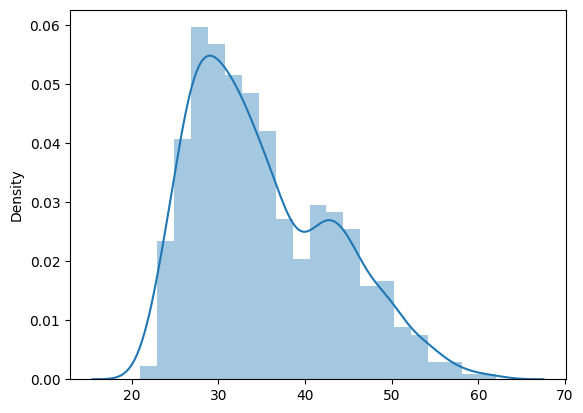

In [9]:
sns.distplot(x = data['Age'])
plt.show()

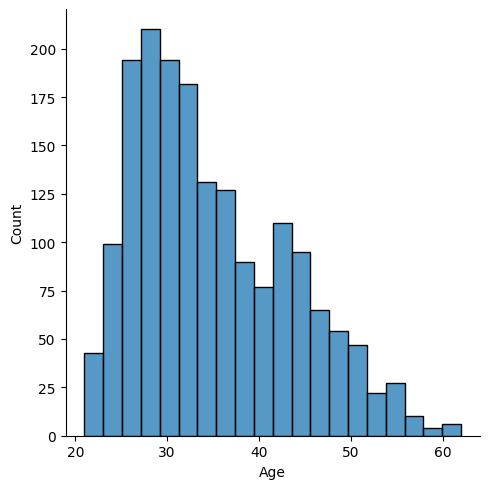

In [10]:
sns.displot(x= 'Age',data = data,bins = 20)

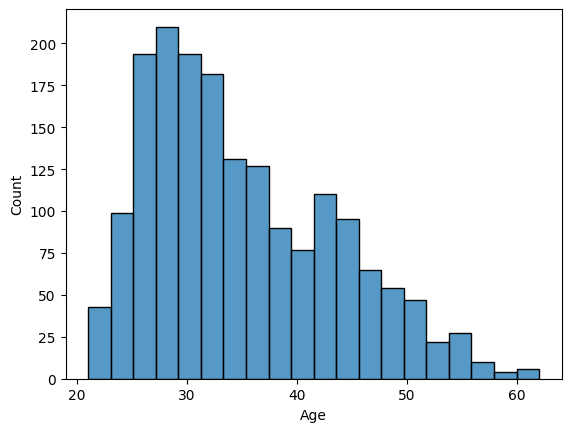

In [11]:
sns.histplot(x = data['Age'], bins=20)
plt.show()

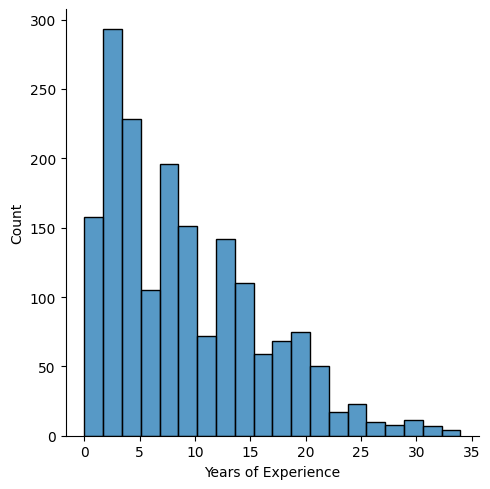

In [12]:
sns.displot(x = 'Years of Experience', data=data, bins=20)
plt.show()

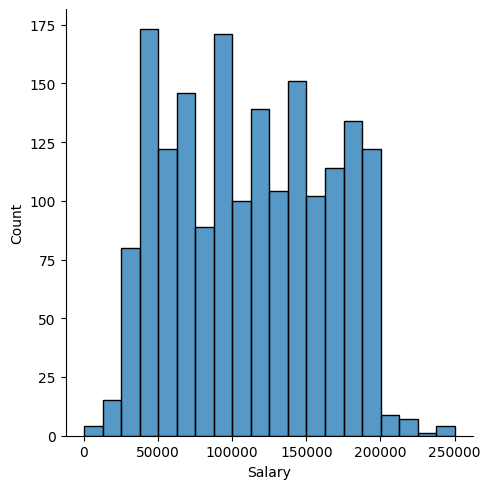

In [13]:
sns.displot(x = 'Salary', data=data, bins=20)
plt.show()

In [14]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [15]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

## Task: Is there any relation between YOE and Salary?

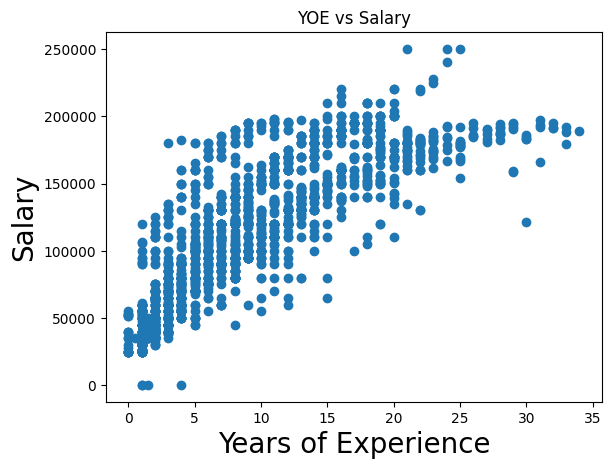

In [16]:
plt.scatter(x = 'Years of Experience',y='Salary', data=data)
plt.xlabel('Years of Experience', fontsize=20)
plt.ylabel('Salary', fontsize=20)
plt.title('YOE vs Salary')
plt.show()

it means, some records have zero salary - need to check them.
and there generally its increasing with YOE. For more clearity, we will check in correlation

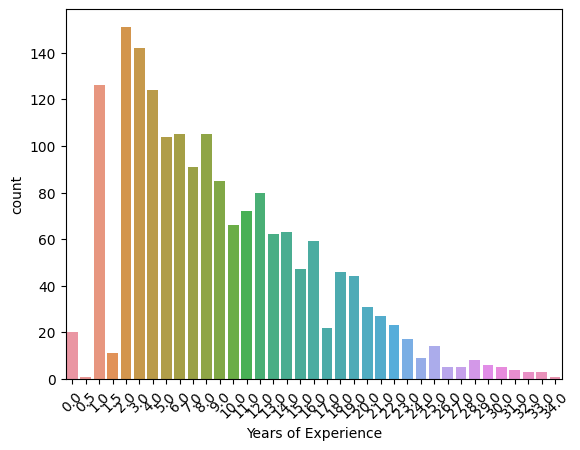

In [17]:
sns.countplot(x = 'Years of Experience', data=data)
plt.xticks(rotation=45)
plt.show()

it means, most records are present for YOE 2 years.

## Task: How many Job Title are there? and for which Job Title most and less salary is given

In [18]:
data.groupby('Job Title')['Salary'].sum().sort_values(ascending = False)

Job Title
Software Engineer Manager             21839694.0
Full Stack Engineer                   15693558.0
Senior Software Engineer              14820070.0
Senior Project Engineer               14434690.0
Data Scientist                        13018000.0
                                         ...    
Junior Business Operations Analyst       35350.0
Junior Customer Support Specialist       35000.0
Data Entry Clerk                         35000.0
Help Desk Analyst                        35000.0
Delivery Driver                          28000.0
Name: Salary, Length: 191, dtype: float64

In [19]:
data['Job Title'].nunique()

191

it means, there were total 191 Job Titles are there.

In [20]:
## Find top 10 according to their number of records
data['Job Title'].value_counts()[:10]

Software Engineer Manager    127
Full Stack Engineer          122
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
Data Scientist                80
Software Engineer             78
Front end Developer           71
Marketing Manager             55
Product Manager               53
Name: Job Title, dtype: int64

In [21]:
data['Job Title'].value_counts()[:10].index,data['Job Title'].value_counts()[:10].values

(Index(['Software Engineer Manager', 'Full Stack Engineer',
        'Senior Software Engineer', 'Senior Project Engineer',
        'Back end Developer', 'Data Scientist', 'Software Engineer',
        'Front end Developer', 'Marketing Manager', 'Product Manager'],
       dtype='object'),
 array([127, 122,  96,  95,  81,  80,  78,  71,  55,  53]))

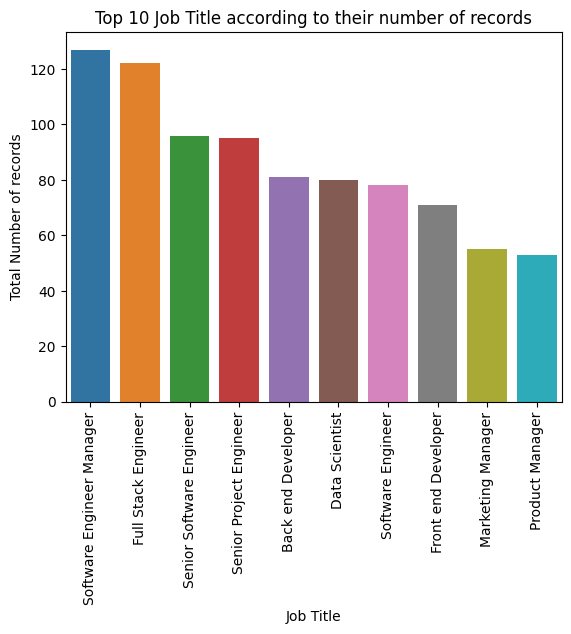

In [22]:
sns.barplot(x = data['Job Title'].value_counts()[:10].index,
            y = data['Job Title'].value_counts()[:10].values)
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Total Number of records')
plt.title('Top 10 Job Title according to their number of records')
plt.show()

In [23]:
data.groupby('Job Title')[['Salary']].max().reset_index().sort_values(by = ['Salary'], ascending=False)[:10]

,Job Title,Salary
9,Chief Technology Officer,250000.0
7,CEO,250000.0
41,Financial Manager,250000.0
20,Data Scientist,240000.0
96,Marketing Manager,228000.0
8,Chief Data Officer,220000.0
27,Director of Data Science,220000.0
158,Senior Project Engineer,210000.0
176,Software Engineer Manager,210000.0
156,Senior Product Marketing Manager,200000.0


In [24]:
data.groupby('Job Title')[['Salary']].min().reset_index().sort_values(by = ['Salary'], ascending=False)[:10]

,Job Title,Salary
7,CEO,250000.0
9,Chief Technology Officer,250000.0
8,Chief Data Officer,220000.0
25,Director,200000.0
188,VP of Finance,200000.0
101,Operations Director,190000.0
189,VP of Operations,190000.0
32,Director of Human Resources,185000.0
28,Director of Engineering,180000.0
31,Director of Human Capital,180000.0


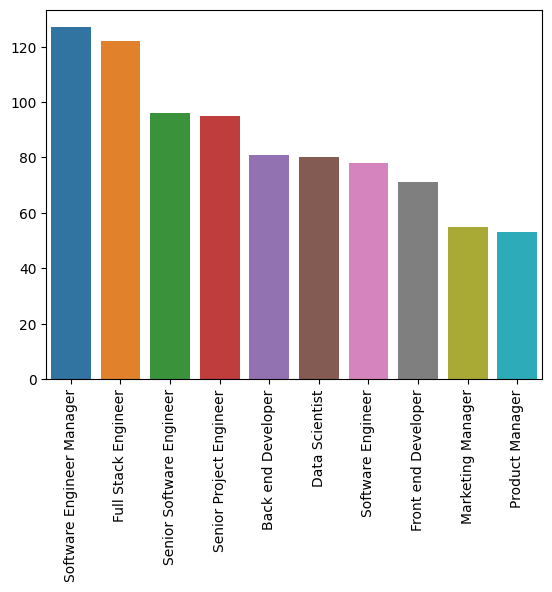

In [25]:
sns.barplot(x = data['Job Title'].value_counts().index[:10],y = data['Job Title'].value_counts().values[:10])
plt.xticks(rotation = 90)
plt.show()

In [26]:
## Now, finding top 10 max and min salary Job Title

max_salary_job_title = data.groupby('Job Title')[['Salary']].max().reset_index()
min_salary_job_title = data.groupby('Job Title')[['Salary']].min().reset_index()

In [27]:
max_salary_job_title = max_salary_job_title.sort_values(by = ['Salary'], ascending=False)
max_salary_job_title = max_salary_job_title.head(10)
min_salary_job_title = min_salary_job_title.sort_values(by = ['Salary'])
min_salary_job_title = min_salary_job_title.head(10)

In [28]:
data.groupby('Job Title')['Salary'].count()

Job Title
Account Manager              1
Accountant                   1
Administrative Assistant     2
Back end Developer          81
Business Analyst             2
                            ..
UX Designer                  1
UX Researcher                1
VP of Finance                1
VP of Operations             1
Web Developer               34
Name: Salary, Length: 191, dtype: int64

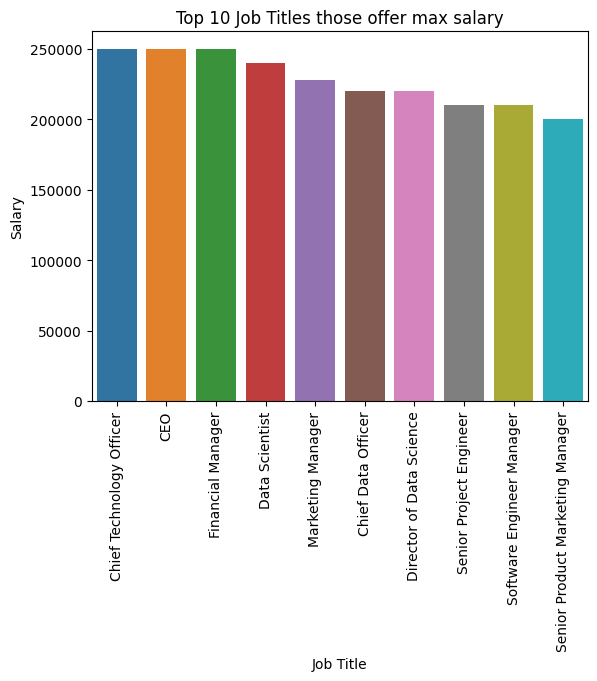

In [29]:
sns.barplot(x = 'Job Title', y='Salary', data=max_salary_job_title)
plt.xticks(rotation=90)
plt.title('Top 10 Job Titles those offer max salary')
plt.show()

it means, maximum salary is provided to CTO of companies

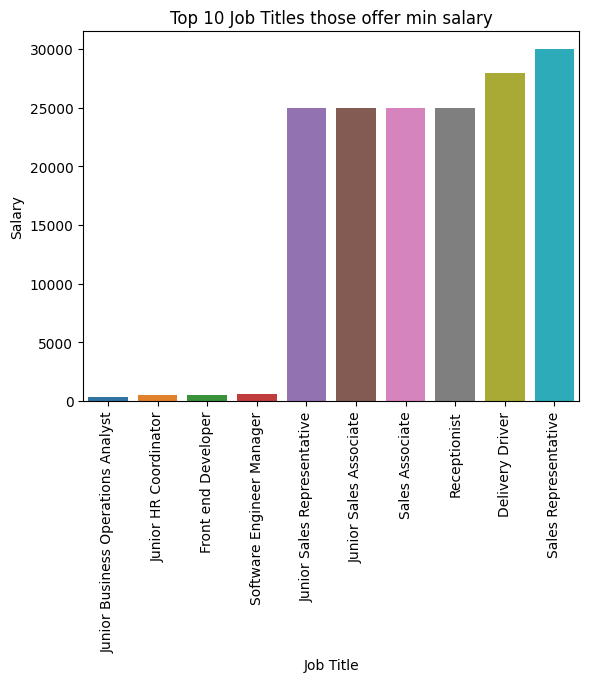

In [30]:
sns.barplot(x = 'Job Title', y='Salary', data=min_salary_job_title)
plt.xticks(rotation=90)
plt.title('Top 10 Job Titles those offer min salary')
plt.show()

it means, min salary is offered to junior business Operations Analyst

## Task: Who will take more salary Male or Female? and what about their experience?

In [31]:
data.groupby('Gender')['Salary'].mean(),data.groupby('Gender')['Salary'].median()

(Gender
 Female    107294.798526
 Male      118056.198758
 Other     125819.000000
 Name: Salary, dtype: float64,
 Gender
 Female    104851.0
 Male      120000.0
 Other     158254.0
 Name: Salary, dtype: float64)

<AxesSubplot: xlabel='Gender', ylabel='Salary'>

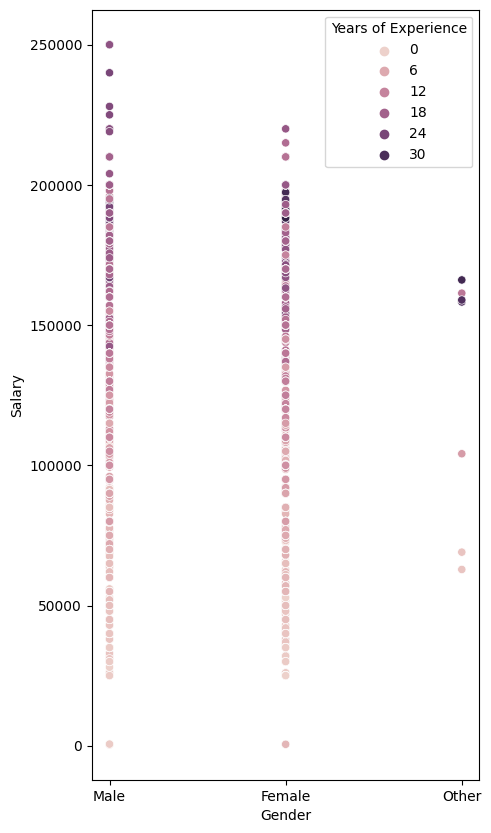

In [32]:
plt.figure(figsize = (5,10))
sns.scatterplot(x = 'Gender',y = 'Salary',hue = 'Years of Experience',data = data)

/tmp/ipykernel_20/130960312.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1)` for the same effect.

  sns.barplot(x = 'Years of Experience', y='Salary', hue='Gender',data=data, ci=1)


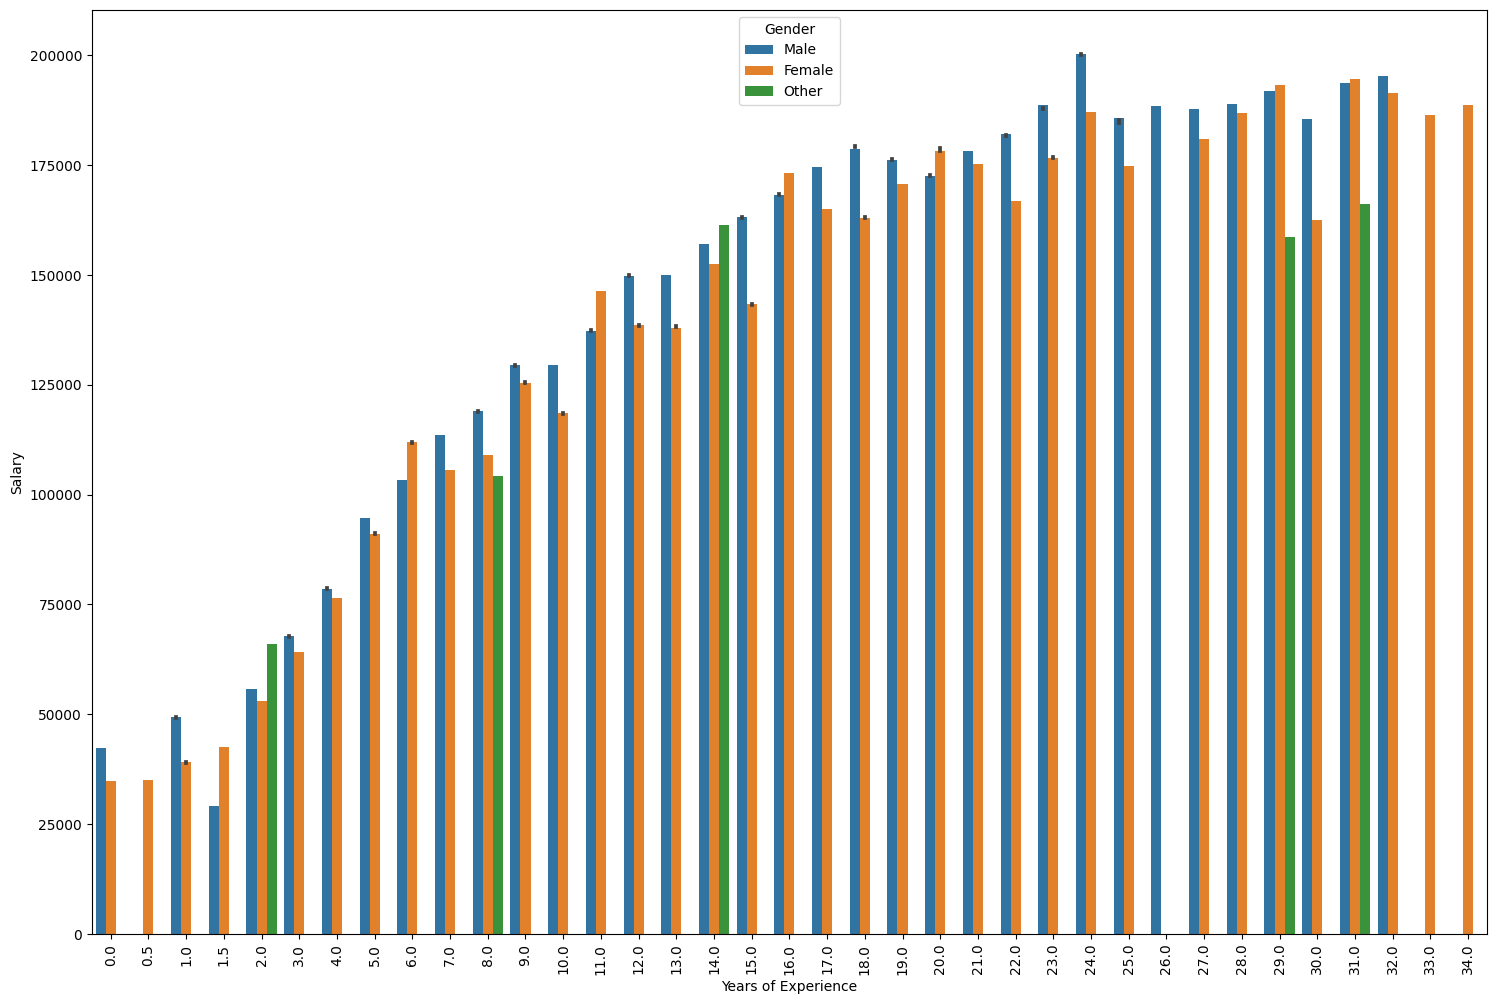

In [33]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Years of Experience', y='Salary', hue='Gender',data=data, ci=1)
plt.xticks(rotation=90)
plt.show()

Some important conslusions:
* For YOE 26, only male records are there
* For YOE 33 and 34, only female records are there

In [34]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Task: is higher Education offers more Salary?

/tmp/ipykernel_20/2815327524.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1)` for the same effect.

  sns.barplot(x = 'Education Level', y='Salary',data=data, ci=1)


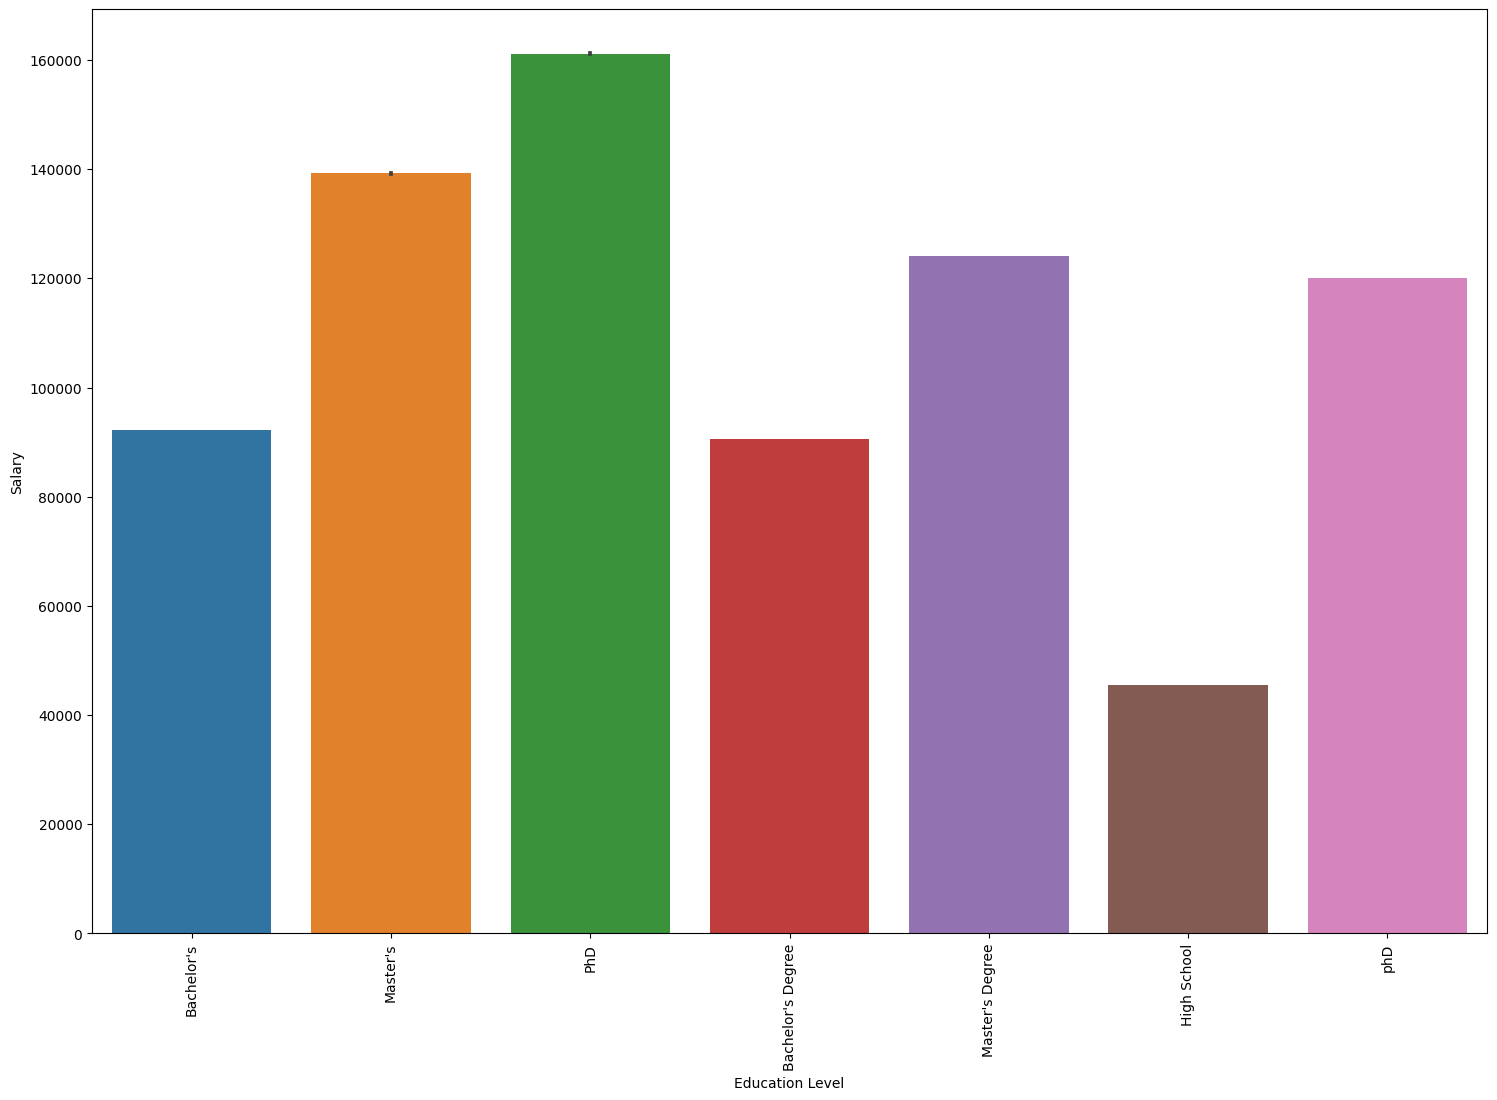

In [35]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Education Level', y='Salary',data=data, ci=1)
plt.xticks(rotation=90)
plt.show()

In [36]:
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

First we have to clean this data, 
* Bachelor's and Bachelor's Degree are same.
* Master's and Master's Degree are same.
* PhD and phD are same.

In [37]:
## Data Cleaning for Education Level column
data['Education Level'] = data['Education Level'].replace({"Bachelor's Degree": "Bachelor's",
                                                           "Master's Degree": "Master's",
                                                           "PhD" : "phD"})
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,phD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's,Sales Director,7.0,90000.0


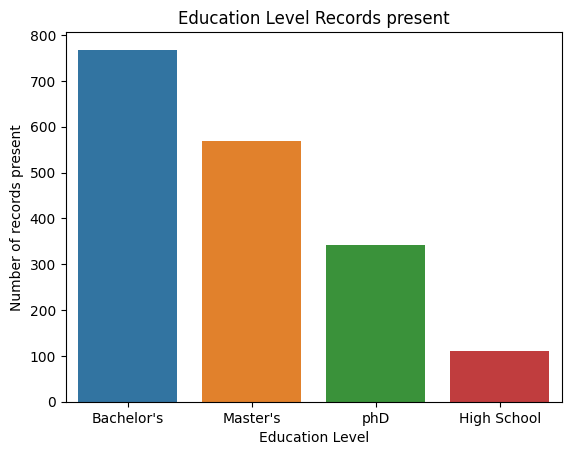

In [38]:
## First represent their count of records of Education Level
sns.barplot(x = data['Education Level'].value_counts().index,
            y = data['Education Level'].value_counts().values)
plt.title('Education Level Records present')
plt.xlabel('Education Level')
plt.ylabel('Number of records present')
plt.show()

it means, most records are present for Bachelor's

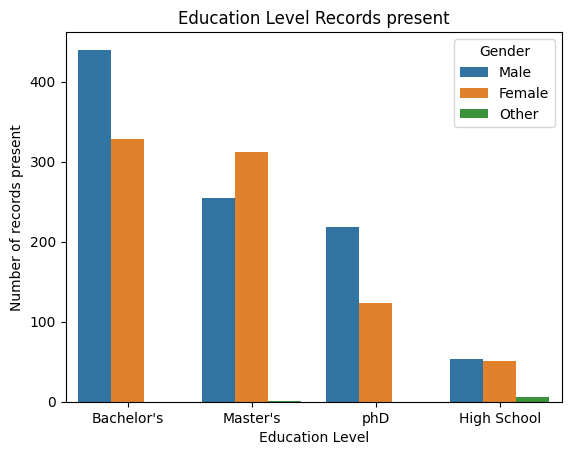

In [39]:
## First represent their count of records of Education Level based on their gender
sns.countplot(x = 'Education Level',
              data=data,
              hue='Gender')
plt.title('Education Level Records present')
plt.xlabel('Education Level')
plt.ylabel('Number of records present')
plt.show()

it means, more females are there in Master's

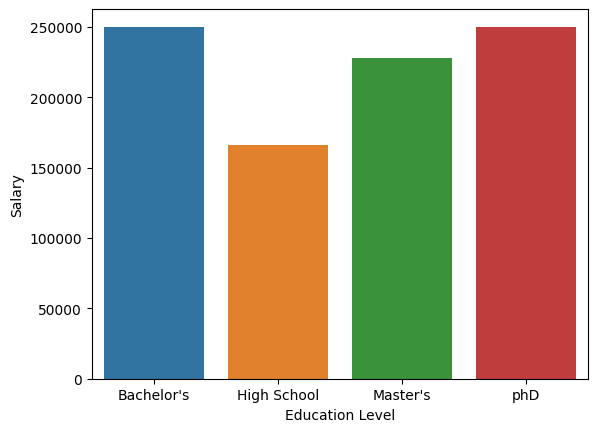

In [40]:
## Now, find relation between Education Level and Salary
education_level_salary = data.groupby('Education Level')[['Salary']].max().reset_index()
sns.barplot(x = 'Education Level',
            y = 'Salary',
            data = education_level_salary)
plt.show()

it means, most salary is given to Bachelor's degree peoples

## Task: Find Correlation

In [41]:
## first convert Gender and Education Level to int
data['Gender'] = data['Gender'].replace({'Male': 0,'Female':1})
data['Education Level'] = data['Education Level'].replace({"Bachelor's" : 0,
                                                           "Master's" : 1,
                                                           "High School": 2,
                                                           "phD" : 3})
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,0,0,Software Engineer,5.0,90000.0
1,28.0,1,1,Data Analyst,3.0,65000.0
2,45.0,0,3,Senior Manager,15.0,150000.0
3,36.0,1,0,Sales Associate,7.0,60000.0
4,52.0,0,1,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,1,1,Digital Marketing Manager,15.0,150000.0
6624,27.0,0,2,Sales Manager,2.0,40000.0
6625,33.0,1,0,Director of Marketing,8.0,80000.0
6628,37.0,0,0,Sales Director,7.0,90000.0


/tmp/ipykernel_20/148596275.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='BrBG')


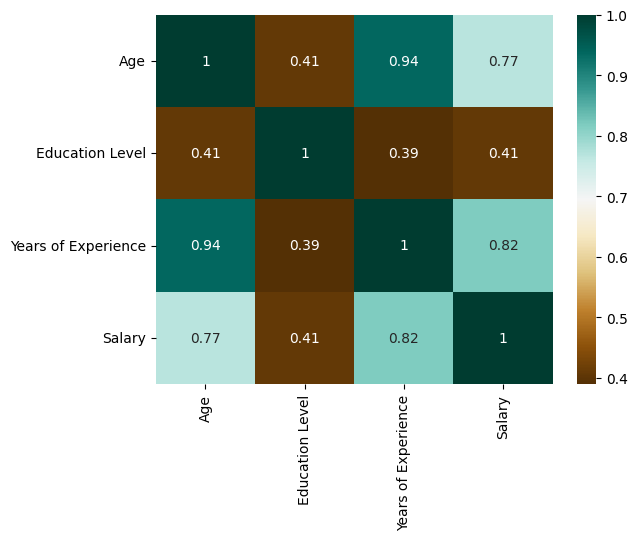

In [42]:
sns.heatmap(data.corr(), annot=True, cmap='BrBG')
plt.show()

it means, the Age and YOE is highly correlated that is genunie.

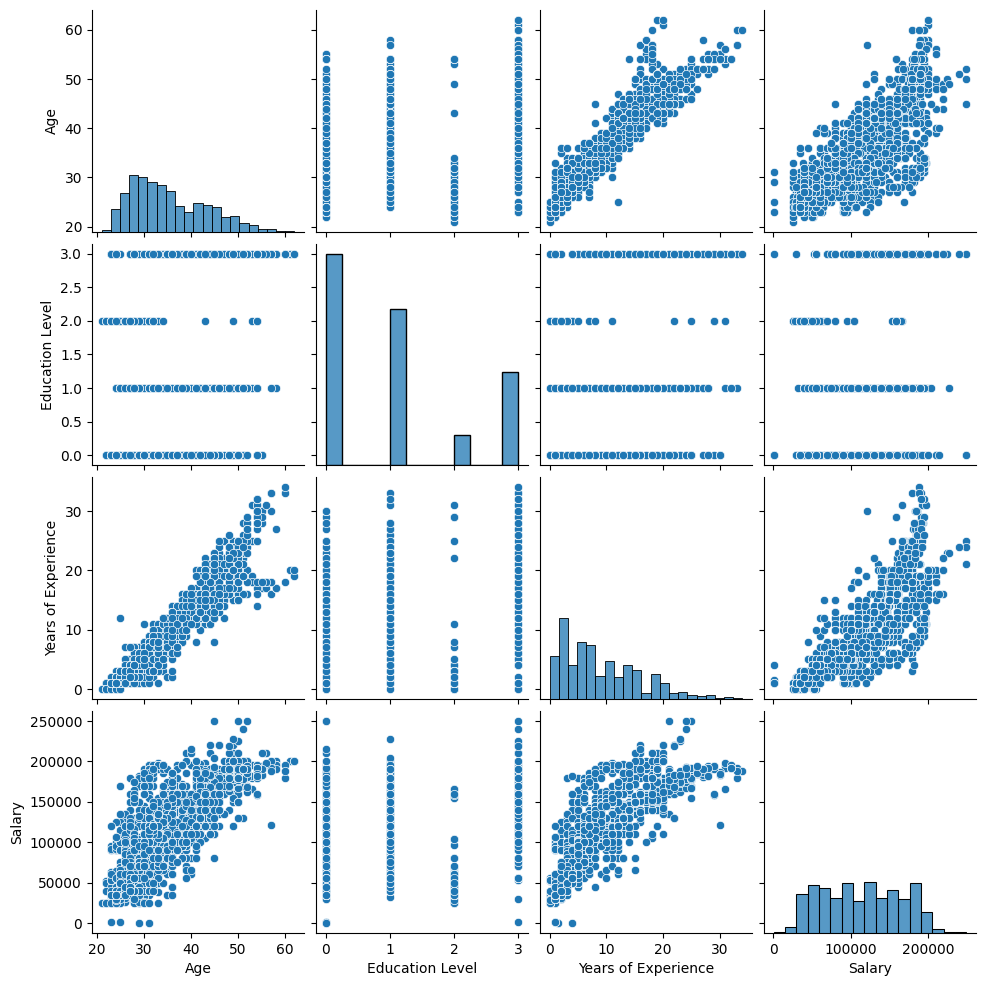

In [43]:
sns.pairplot(data)

it means, there is positive correlation between YOE and Salary, Age and Salary.

## if you like the notebook, please upvote the notebook